Projeto com objetivo de fazer algumas análises estatisticas usando diversas ferramentas


Foram feitas análises em diferentes features

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

Realizado uma limpeza de dados simples sendo:
- renomear colunas
- normalizar nomes da coluna features
- retirar linhas em branco (feature genero), excluir linhas com dados incompativeis (features idade e salario)
- na feaures eatados, retirar estados 'outliers', ou 'perdidos'
- retirar possiveis linhas duiplicadas

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/+/xxx.csv",sep=';')
df.columns=['ID','Score','Estado','Genero','Idade','Patrimonio','Saldo','Produtos','TemCartCredito','Ativo','Salario','Saiu']

df['Genero'].unique()
df['Genero']=df['Genero'].replace({'M':'Masculino','F':'Feminino','Fem':"Feminino"})
df.dropna(subset='Genero',inplace=True)
x=df[df.Salario.isna()]
df.drop(x.index,inplace=True)

x=df[(df['Idade']<18)| (df['Idade']>83) ]
df.drop(x.index,inplace=True)

x=df.sort_values('Salario').tail(4)
df.drop(x.index,inplace=True)

lista=['RP','SP','TD']
x=df[df['Estado'].isin (lista)]
df.drop(x.index,inplace=True)

df[df.duplicated(keep=False)]
df.drop(80,inplace=True)
df.reset_index()
df.head(1)

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1


In [5]:
df.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Analise simples de estatistica, com destaque e explicação para estas abaixo:
- variancia: apenas na coluna features há uma diferença absurda entre os valores, o que indica que os salários têm uma grande variação em relação à média, devido aos altos valores.
- assimetria: valor de feature 'saiu' informa que a distribuição esta um pouco mais inclinada para a direita, já nas demais colunas, os valores são muito proximo de 0, assim não há relevancia
- kurtosis: a feature ativo, mostra que há menos valores extremes comparado com as demais features

In [6]:
listacol=[]
for i in df.columns:
  if not isinstance(df[i][0],str):
    listacol.append(i)

linhas=['media','mediana','minimo','maximo','desvio padrao','variancia','assimetria','kurtosis (cauda)']
df2=pd.DataFrame(index=linhas,columns=listacol)

for col in listacol:
  listaInd=[
    np.mean(df[col]),
    np.median(df[col]),
    df[col].min(),
    df[col].max(),
    np.std(df[col],ddof=1),
    stats.describe(df[col])[3] ,
    stats.describe(df[col])[4] ,
    stats.describe(df[col])[5] ]

  j=0
  for indicador in listaInd:
    df2[col][j]=indicador
    j=j+1
df2.T.tail()

,media,mediana,minimo,maximo,desvio padrao,variancia,assimetria,kurtosis (cauda)
Produtos,1.521244,1.0,1,4,0.569646,0.324496,0.556874,-0.484886
TemCartCredito,0.702591,1.0,0,1,0.457355,0.209174,-0.886382,-1.214327
Ativo,0.510881,1.0,0,1,0.500141,0.250141,-0.043534,-1.998105
Salario,8886353.264249,8642457.0,9677.0,19972539.0,6074460.851622,36899074637882.617188,0.123247,-1.250855
Saiu,0.202073,0.0,0,1,0.401754,0.161406,1.483902,0.201965


Intervalo de confiança

O Intervalo de confiança, nos mostra que 95% dos dados da faetures salario, esta no intervalo conforme mostrado abaixo

In [7]:
n = len(df['Salario'])                                   # Tamanho da amostra
media = np.mean(df['Salario'])
desvio_padrao = np.std(df['Salario'], ddof=1)            # ddof=1 para amostras (desvio padrão amostral) (SIGMA)
erro_padrao = desvio_padrao / np.sqrt(n)                 # Calcular o erro padrão
confianca = 0.95                                         # Nível de confiança de 95% (valor crítico z = 1.96 para 95%)
z_critico = stats.norm.ppf((1 + confianca) / 2)          # z_critico = 1.96 para 95%

limite_inferior = media - z_critico * erro_padrao        # Calcular o intervalo de confiança
limite_superior = media + z_critico * erro_padrao
print(f"Intervalo de Confiança (95%): ({limite_inferior},     {limite_superior})")

Intervalo de Confiança (95%): (8503094.432156976,     9269612.096340433)


Abaixo geramos o valor Z referente a feature Salario, o calculo é feito com o valor do desvio padrão, assim apenas a olho' nao fica claro como chegou ao valor da coluna 'z_score', Porem podemos interpretar assim :


Valores próximos de 0 → Estão próximos da média.

Valores positivos → Estão acima da média (quanto maior, mais distante).

Valores negativos → Estão abaixo da média (quanto menor, mais distante).

Valores muito altos (>2 ou <-2) → Podem ser outliers


In [25]:
df['z_Salario'] = stats.zscore(df['Salario'])
df[['Salario','z_Salario']]

,Salario,z_Salario
0,10134888.0,0.205645
1,11254258.0,0.390015
2,11393157.0,0.412893
3,9382663.0,0.081747
4,790841.0,-1.333404
...,...,...
994,14576583.0,0.937232
995,8391224.0,-0.081552
996,7843973.0,-0.171689
997,677692.0,-1.352041


Diagrama de probabilidade Normal usando o QQ Plot (Teste de Normalidade)

Referente a  coluna Idade, vemos como se comporta os dados graficamente comparado a linha normalizada. Os dados seguem a reta, assim os dados desta features podem ser usadas paar análises

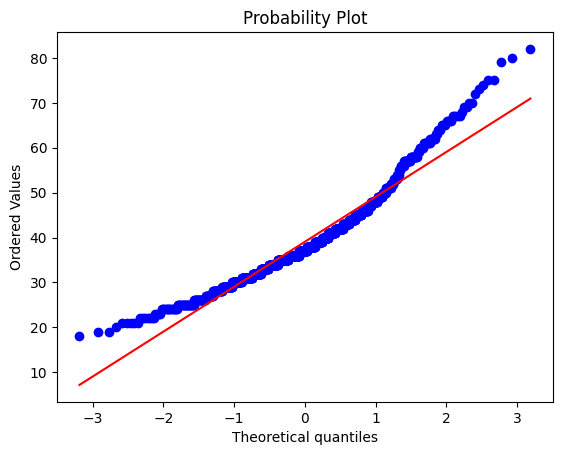

In [9]:
stats.probplot(df['Idade'], dist="norm", plot=plt)            # Se os pontos no gráfico estiverem aproximadamente alinhados com a linha reta, isso indica que a distribuição dos dados é próxima à normal.
plt.show()

# dist="norm": Define a distribuição para a qual o teste será feito (normal, nesse caso).
# plot=plt: Informa que o gráfico será plotado usando o matplotlib.pyplot.

No Histograma, vemos que na feature Salario, predomina os valores mais baixos

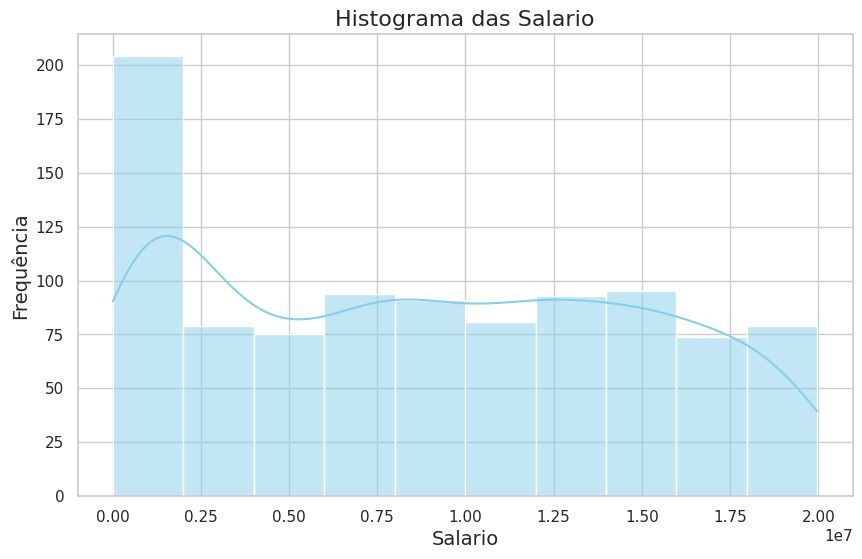

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Salario'], bins=10, kde=True, color='skyblue')

plt.title('Histograma das Salario', fontsize=16)
plt.xlabel('Salario', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

Teste de Distribuição de Probabilidade

Outro teste para verificar se são validos, os valores da feature idade

In [11]:
stat, p_value = stats.shapiro(df['Idade'])                                            # stats.anderson
print(f'Estatística do teste:             {stat}')
print(f'Valor p:              {p_value}')

if p_value > 0.05:
    print("A distribuição da idade parece ser normal (não rejeitamos a hipótese nula).")
else:
    print("A distribuição da idade não parece ser normal (rejeitamos a hipótese nula).")

Estatística do teste:             0.9446192161243183
Valor p:              1.568606881590149e-18
A distribuição da idade não parece ser normal (rejeitamos a hipótese nula).


----------- COMPARAÇÃO ENTRE FEATURES

Correlação e Covariancia entre 2 features
______

Covariancia

Valor positivo → Se uma variável aumenta, a outra tende a aumentar.

Valor negativo → Se uma variável aumenta, a outra tende a diminuir.

Valor próximo de 0 → Não há relação linear clara.
Unidade dependente dos dados → O valor depende das escalas das variáveis.

_______

Correlação

+1 → Correlação perfeita e positiva (se X sobe, Y sobe).

-1 → Correlação perfeita e negativa (se X sobe, Y desce).

0 → Nenhuma correlação linear.


In [27]:
covarianca = df[['Idade', 'Salario']].cov().iloc[0, 1]
print(f"Covariância: {covarianca}")

correlacao = df['Idade'].corr(df['Salario'])
print(f"Correlação: {correlacao}")

Covariância: -697427.3321329518
Correlação: -0.011186902001219681


Logo, pela covariancia, se uma das 2 features aumenta, a outra tende a diminuir, já para a correlação, praticamente não há

Agora calculando a matriz de correlação entre 3 features

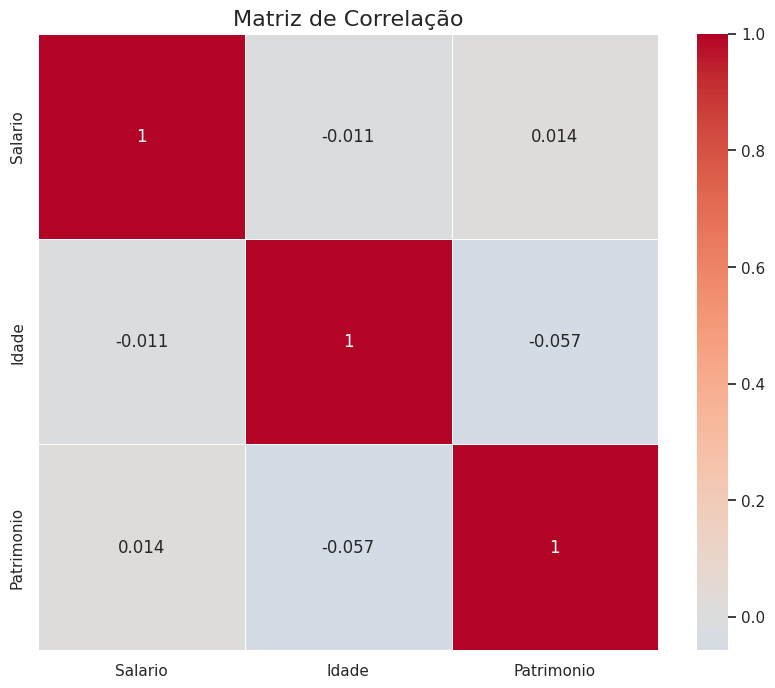

In [13]:
correlation_matrix = df[['Salario','Idade','Patrimonio']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Todos muito proximo de 0, assim praticamente nao há correlação

Calculando a matriz de COVARIANCIA entre 3 features

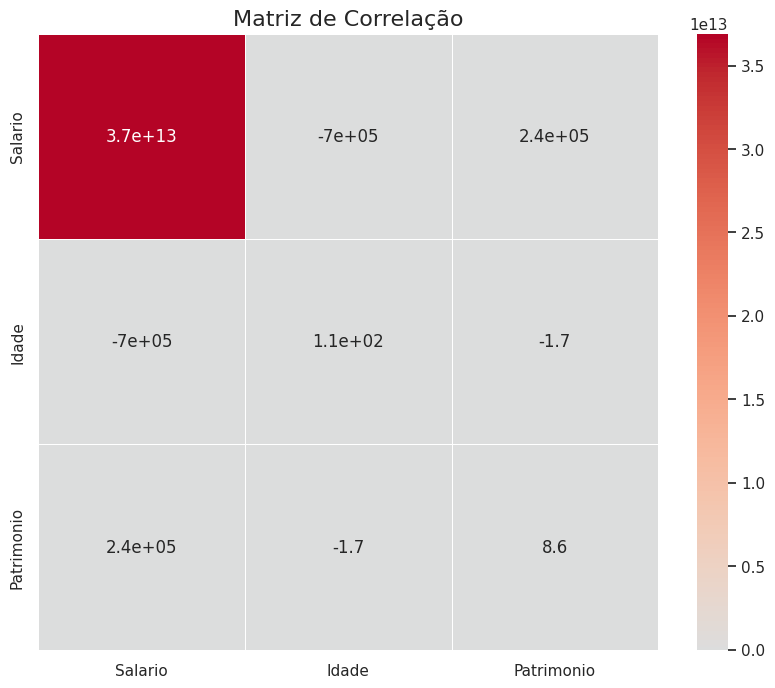

In [14]:
correlation_matrix = df[['Salario','Idade','Patrimonio']].cov()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

É possivel encontrar covariancia conforme gráfico acima

mais comparações usando gráficos de Distribuição de Dispersão

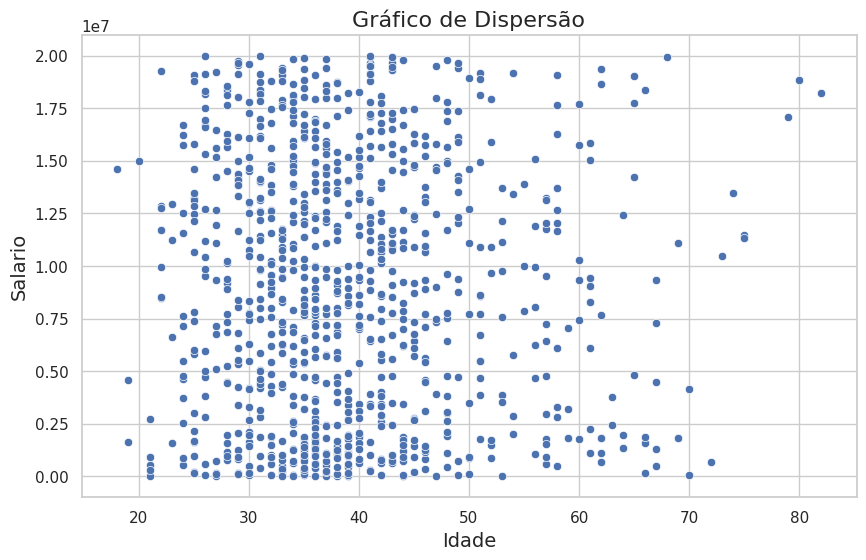

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='Salario', data=df)

plt.title('Gráfico de Dispersão', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Salario', fontsize=14)
plt.show()

Dados muito bem distribuidos, não nos ajuda em nada

e um boxplot

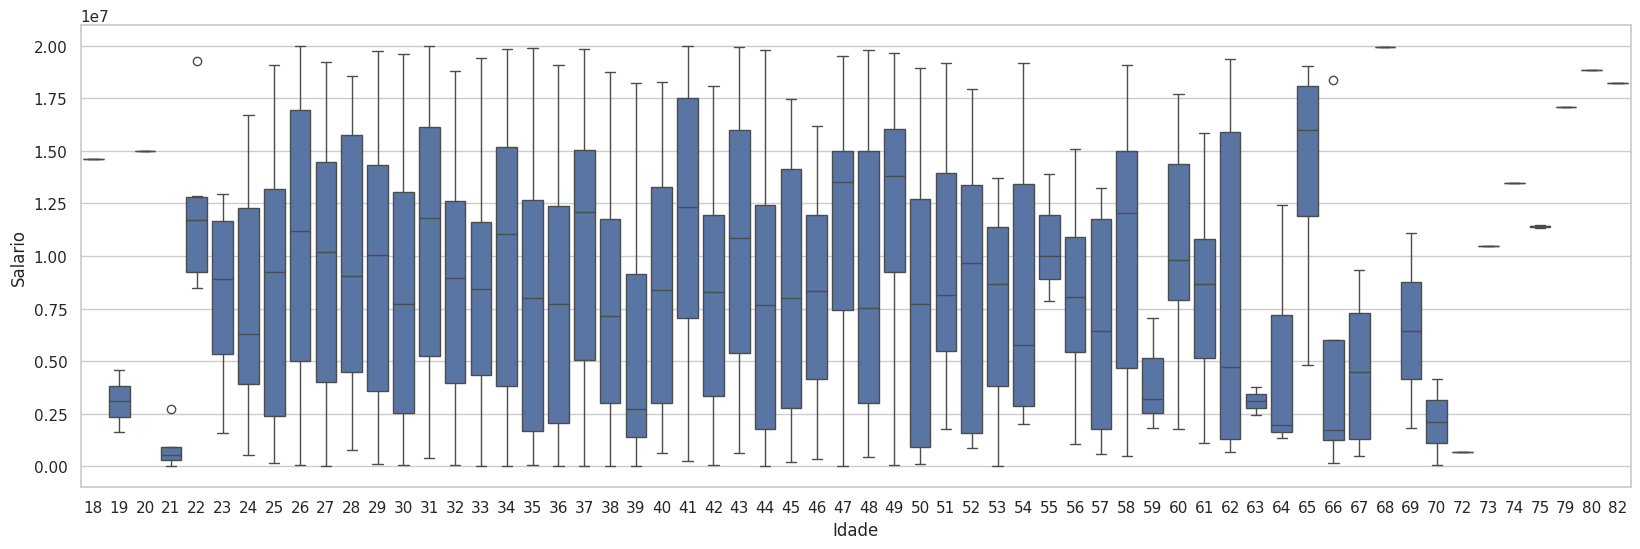

In [28]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df,x='Idade',y='Salario')
plt.show()

Tudo muito dentro do padrão, o que foge um pouco é nos anos acima do 59